<p>
    <img style="float: right; margin: 90px 5px 20px 2px; max-width: 275px;" src="https://freepngimg.com/thumb/football/66114-soccer-photography-football-royalty-free-player-stock-playing.png" alt="Football Image">
</p>

# Data-Driven Goals: A Comprehensive EDA of Football

Football, a global phenomenon that transcends borders and unites millions of passionate fans worldwide, captivates with its rich interweaving of history, rivalries, and emotions. In this comprehensive exploration, we delve into the very essence of the game, unraveling the intricate patterns and nuanced dynamics that shape this enthralling spectacle.

Our dataset is a treasure trove of information, encompassing a vast array of elements that collectively paint a vivid portrait of football's complexity. From match dates and participating teams to scores and managerial tactics, each piece of data holds the potential to unlock invaluable insights. By delving into player appearances, club games, clubs, competitions, game events, games, player valuations, and player profiles, we aim to unravel the multifaceted layers that contribute to the sport's captivating allure.

At the forefront of our investigation is a quest to understand the inner workings of football competitions. We delve into player appearances, club games, competitions, and more, seeking to uncover the underlying patterns and trends that define success on the pitch. By examining player performances, club strategies, and league dynamics, we hope to provide valuable insights that resonate with fans, analysts, and industry professionals alike. By delving into the heart of the game, we aim to unveil the underlying narratives that weave together the enduring appeal of this global phenomenon.

This was a collaborative project undertaken by [Naksh Jain Sonigara](https://www.linkedin.com/in/nakshjainsonigara/) and [Soumya Chauhan](https://www.linkedin.com/in/soumyachauhandotcom/).


## Table of Contents
1. [Data Loading](#Data-Loading)
2. [Data Exploration](#Data-Exploration)
3. [Player Club Appearances Overview](#Player-Club-Appearances-Overview)
4. [Player Height Distribution Analysis for Centre-Forwards](#Player-Height-Distribution-Analysis-for-Centre-Forwards)
5. [Analyzing Player Mobility and Transfer Frequencies](#Analyzing-Player-Mobility-and-Transfer-Frequencies)
6. [Player Market Value Trends Over Time](#Player-Market-Value-Trends-Over-Time)
7. [Club Yellow and Red Card Analysis](#Club-Yellow-and-Red-Card-Analysis)
8. [Player Nationality Analysis](#Player-Nationality-Analysis)
9. [Home vs Away Performance Analysis](#Home-vs-Away-Performance-Analysis)
10. [Club Performace Report](#Club-Performace-Report)
11. [Age Group Dynamics and Performance in Football Clubs](#Age-Group-Dynamics-and-Performance-in-Football-Clubs)
12. [Exploring the Relationship Between Squad Size and Win Rates](#Exploring-the-Relationship-Between-Squad-Size-and-Win-Rates)
13. [Top 5 players of individual club](#Top-5-players-of-individual-club)
14. [Top performing clubs of each competitions](#Top-performing-clubs-of-each-competitions)
15. [Top Scorer Analysis](#Top-Scorer-Analysis)

## Importing necessary libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash
from dash import html , dcc
from dash.dependencies import Input, Output
import ipywidgets as widgets
from IPython.display import display, clear_output
import scipy.stats as ss
from sklearn.preprocessing import MinMaxScaler
from os import listdir
from os.path import isfile, join

In [35]:
#Setting plot style to seaborn
plt.style.use("seaborn-v0_8")

## Data Loading

In [37]:
path = r"C:\Users\jainn\OneDrive\Documents\Sem 1\EXCEL\dataS\dcereijo-player-scores"
files = [ f for f in listdir(path) if isfile(join(path, f))]
df = {}
for i in files:
    df[i] = pd.read_csv(path + "//" + i)
# All The datasets: 8 datasets
appearances = df['appearances']
club_games = df['club_games']
clubs = df['clubs']
competitions = df['competitions']
game_events = df['game_events']
games = df['games']
player_valuations = df['player_valuations']
players = df['players']

## Data Exploration

In [38]:
for i,j in df.items():
    print(f"Info for {i}:")
    print(j.info())
    print(f"\nHead of {i}:")
    display(j.head())

Info for appearances:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166215 entries, 0 to 1166214
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1166215 non-null  object
 1   game_id                 1166215 non-null  int64 
 2   player_id               1166215 non-null  int64 
 3   player_club_id          1166215 non-null  int64 
 4   player_current_club_id  1166215 non-null  int64 
 5   date                    1154308 non-null  object
 6   player_name             1165851 non-null  object
 7   competition_id          1166215 non-null  object
 8   yellow_cards            1166215 non-null  int64 
 9   red_cards               1166215 non-null  int64 
 10  goals                   1166215 non-null  int64 
 11  assists                 1166215 non-null  int64 
 12  minutes_played          1166215 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 115.7+ MB
Non

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,-1_172127,-1,172127,3999,3999,NaN,Tyronne,GRP,0,0,0,0,90
1,-1_210988,-1,210988,3999,553,NaN,Christos Eleftheriadis,GRP,0,0,0,0,90
2,-1_231471,-1,231471,3999,3999,NaN,Theofanis Tzandaris,GRP,0,0,0,0,90
3,-1_256819,-1,256819,3999,3999,NaN,Nikolaos Tsoukalos,GRP,0,0,0,0,90
4,-1_281919,-1,281919,3999,3999,NaN,Adam Tzanetopoulos,GRP,0,0,0,0,90


Info for clubs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  411 non-null    int64  
 1   club_code                411 non-null    object 
 2   name                     236 non-null    object 
 3   domestic_competition_id  411 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               411 non-null    int64  
 6   average_age              373 non-null    float64
 7   foreigners_number        411 non-null    int64  
 8   foreigners_percentage    365 non-null    float64
 9   national_team_players    411 non-null    int64  
 10  stadium_name             411 non-null    object 
 11  stadium_seats            411 non-null    int64  
 12  net_transfer_record      411 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_seaso

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,127,sc-paderborn-07,NaN,L1,NaN,26,25.7,5,19.2,1,Home Deluxe Arena,15000,€-450k,NaN,2019,https://www.transfermarkt.co.uk/sc-paderborn-0...
1,192,roda-jc-kerkrade,NaN,NL1,NaN,25,23.9,9,36.0,0,Parkstad Limburg Stadion,19979,+€1.30m,NaN,2017,https://www.transfermarkt.co.uk/roda-jc-kerkra...
2,2239,us-cremonese,US Cremonese,IT1,NaN,26,26.0,12,46.2,7,Giovanni Zini,16003,€-33.80m,NaN,2022,https://www.transfermarkt.co.uk/us-cremonese/s...
3,2423,cd-santa-clara,CD Santa Clara,PO1,NaN,31,25.8,20,64.5,2,Estádio de São Miguel,15000,+€5.85m,NaN,2022,https://www.transfermarkt.co.uk/cd-santa-clara...
4,24245,umraniyespor,Ümraniyespor,TR1,NaN,24,28.4,10,41.7,3,Ümraniye Belediyesi Şehir Stadı,3513,+-0,NaN,2022,https://www.transfermarkt.co.uk/umraniyespor/s...


Info for club_games:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123076 entries, 0 to 123075
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   game_id                123076 non-null  int64 
 1   club_id                123076 non-null  int64 
 2   own_goals              123076 non-null  int64 
 3   own_position           123076 non-null  int64 
 4   own_manager_name       121728 non-null  object
 5   opponent_id            123076 non-null  int64 
 6   opponent_goals         123076 non-null  int64 
 7   opponent_position      123076 non-null  int64 
 8   opponent_manager_name  121728 non-null  object
 9   hosting                123076 non-null  object
 10  is_win                 123076 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 10.3+ MB
None

Head of club_games:


,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2221747,440,0,-1,Sven Köhler,52,1,-1,Oliver Reck,Home,0
1,2221760,113,0,-1,Petrik Sander,15,4,-1,Sascha Lewandowski,Home,0
2,2222539,60,1,11,Christian Streich,39,1,10,Thomas Tuchel,Home,0
3,2222541,41,0,15,Thorsten Fink,4,1,6,Dieter Hecking,Home,0
4,2222542,24,2,5,Armin Veh,15,1,12,Sascha Lewandowski,Home,1


Info for competitions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   competition_id        43 non-null     object
 1   competition_code      43 non-null     object
 2   name                  43 non-null     object
 3   sub_type              43 non-null     object
 4   type                  43 non-null     object
 5   country_id            43 non-null     int64 
 6   country_name          36 non-null     object
 7   domestic_league_code  36 non-null     object
 8   confederation         43 non-null     object
 9   url                   43 non-null     object
dtypes: int64(1), object(9)
memory usage: 3.5+ KB
None

Head of competitions:


,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,BE1,jupiler-pro-league,jupiler-pro-league,first_tier,domestic_league,19,Belgium,BE1,europa,https://www.transfermarkt.co.uk/jupiler-pro-le...
1,SCI,supercoppa-italiana,supercoppa-italiana,domestic_super_cup,other,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/supercoppa-ita...
2,SFA,sfa-cup,sfa-cup,domestic_cup,domestic_cup,190,Scotland,SC1,europa,https://www.transfermarkt.co.uk/sfa-cup/starts...
3,UKRS,ukrainian-super-cup,ukrainian-super-cup,domestic_super_cup,other,177,Ukraine,UKR1,europa,https://www.transfermarkt.co.uk/ukrainian-supe...
4,FAC,fa-cup,fa-cup,domestic_cup,domestic_cup,189,England,GB1,europa,https://www.transfermarkt.co.uk/fa-cup/startse...


Info for games:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61538 entries, 0 to 61537
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 61538 non-null  int64  
 1   competition_id          61538 non-null  object 
 2   season                  61538 non-null  int64  
 3   round                   61538 non-null  object 
 4   date                    61538 non-null  object 
 5   home_club_id            61538 non-null  int64  
 6   away_club_id            61538 non-null  int64  
 7   home_club_goals         61538 non-null  int64  
 8   away_club_goals         61538 non-null  int64  
 9   home_club_position      61538 non-null  int64  
 10  away_club_position      61538 non-null  int64  
 11  home_club_manager_name  60864 non-null  object 
 12  away_club_manager_name  60864 non-null  object 
 13  stadium                 61350 non-null  object 
 14  attendance            

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url,home_club_name,away_club_name,aggregate,competition_type
0,2222539,L1,2012,1. Matchday,2012-08-25,60,39,1,1,11,...,Christian Streich,Thomas Tuchel,Dreisamstadion,22500.0,Deniz Aytekin,https://www.transfermarkt.co.uk/sc-freiburg_1-...,SC Freiburg,1.FSV Mainz 05,1:1,domestic_league
1,2222541,L1,2012,1. Matchday,2012-08-25,41,4,0,1,15,...,Thorsten Fink,Dieter Hecking,Volksparkstadion,50123.0,Marco Fritz,https://www.transfermarkt.co.uk/hamburger-sv_1...,NaN,NaN,0:1,domestic_league
2,2222542,L1,2012,1. Matchday,2012-08-25,24,15,2,1,5,...,Armin Veh,Sascha Lewandowski,Commerzbank Arena,27950.0,Thorsten Kinhöfer,https://www.transfermarkt.co.uk/eintracht-fran...,Eintracht Frankfurt,Bayer 04 Leverkusen,2:1,domestic_league
3,2222595,RU1,2012,3. Matchday,2012-08-05,2700,4128,1,0,3,...,Guus Hiddink,Rustem Khuzin,Dinamo,14000.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/anzhi-makhachk...,NaN,NaN,1:0,domestic_league
4,2222636,RU1,2012,4. Matchday,2012-08-12,1083,2696,1,2,15,...,Miodrag Bozovic,Andrey Kobelev,Olimp-2,6800.0,Vitali Meshkov,https://www.transfermarkt.co.uk/fk-rostov_kryl...,FK Rostov,Krylya Sovetov Samara,1:2,domestic_league


Info for game_events:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559962 entries, 0 to 559961
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   game_id       559962 non-null  int64  
 1   minute        559962 non-null  int64  
 2   type          559962 non-null  object 
 3   club_id       559962 non-null  int64  
 4   player_id     559962 non-null  int64  
 5   description   169995 non-null  object 
 6   player_in_id  389422 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 29.9+ MB
None

Head of game_events:


,game_id,minute,type,club_id,player_id,description,player_in_id
0,2221747,70,Substitutions,52,2125,NaN,43984.0
1,2221747,80,Substitutions,440,23566,NaN,40679.0
2,2221747,86,Substitutions,52,8639,NaN,42749.0
3,2221747,88,Substitutions,440,43822,NaN,83191.0
4,2221760,68,Substitutions,15,61087,NaN,39102.0


Info for players:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28459 entries, 0 to 28458
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28459 non-null  int64  
 1   first_name                            26609 non-null  object 
 2   last_name                             28459 non-null  object 
 3   name                                  28459 non-null  object 
 4   last_season                           28459 non-null  int64  
 5   current_club_id                       28459 non-null  int64  
 6   player_code                           28459 non-null  object 
 7   country_of_birth                      26660 non-null  object 
 8   city_of_birth                         26670 non-null  object 
 9   country_of_citizenship                28458 non-null  object 
 10  date_of_birth                         28417 non-null  object 
 1

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,NaN,NaN,NaN,19000000.0,NaN,fair-sport GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/aleksandr-hleb...,RU1,Krylya Sovetov Samara
1,1428,Mike,Hanke,Mike Hanke,2013,60,mike-hanke,Germany,Hamm,Germany,...,right,185.0,NaN,5000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mike-hanke/pro...,L1,SC Freiburg
2,1560,Youssef,El Akchaoui,Youssef El Akchaoui,2012,306,youssef-el-akchaoui,Netherlands,Dordrecht,Morocco,...,NaN,NaN,NaN,1750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/youssef-el-akc...,NL1,SC Heerenveen
3,1587,Mario,Eggimann,Mario Eggimann,2012,42,mario-eggimann,Switzerland,Brugg,Switzerland,...,right,190.0,NaN,3000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mario-eggimann...,L1,NaN
4,1726,Heiko,Westermann,Heiko Westermann,2016,610,heiko-westermann,Germany,Alzenau,Germany,...,right,190.0,NaN,9000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/heiko-westerma...,NL1,Ajax Amsterdam


Info for player_valuations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424323 entries, 0 to 424322
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            424323 non-null  int64 
 1   last_season                          424323 non-null  int64 
 2   datetime                             424323 non-null  object
 3   date                                 424323 non-null  object
 4   dateweek                             424323 non-null  object
 5   market_value_in_eur                  424323 non-null  int64 
 6   n                                    424323 non-null  int64 
 7   current_club_id                      424323 non-null  int64 
 8   player_club_domestic_competition_id  424323 non-null  object
dtypes: int64(5), object(4)
memory usage: 29.1+ MB
None

Head of player_valuations:


,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1


## Player Club Appearances Overview

This section of the analysis focuses on determining the frequency of player appearances for each club. By correlating player appearances with club , insights into player performance and club engagement are unveiled. The Aggregated player appearances are presented to illustrate the frequency of matches played by each player for their respective clubs.

In [39]:
club_p=pd.merge(appearances[["appearance_id","game_id","player_name"]],club_games[['game_id','club_id']],on="game_id",how="left")
club_p=club_p.dropna().drop(columns="game_id")
club_p=pd.merge(club_p,clubs[['club_id','name']],on="club_id",how="left")
club_p=pd.pivot_table(club_p,index=["player_name","name"],values="appearance_id",aggfunc="count").sort_values("appearance_id",ascending=False)
club_p.columns=['No. of Matches']
display(club_p[club_p['No. of Matches']>1])

,,No. of Matches
player_name,name,
Sergio Busquets,FC Barcelona,421
Thomas Müller,Bayern Munich,403
Koke,Atlético de Madrid,403
Toni Kroos,Real Madrid,397
David de Gea,Manchester United,393
...,...,...
Rafael Forster,Fenerbahce,2
Orest Lebedenko,Shakhtar Donetsk,2
Tarik Elyounoussi,SC Freiburg,2


This unveils the vast disparity in appearances, with some players having minimal contributions, as illustrated by **Rafael Forster's** two appearances for both Fenerbahce and Manchester United whereas **Sergio Busquets** 421 appearances for FC Barcelona.

In [40]:
display(club_p[club_p['No. of Matches']>1].sort_values(by="player_name").head(20))

No. of Matches
player_name        name                                  
A.J. Soares        Aarhus GF                            6
AJ Leitch-Smith    Aberdeen FC                          2
                   Motherwell FC                        4
                   Hibernian FC                         2
                   Kilmarnock FC                        2
                   St. Johnstone FC                     3
                   Heart of Midlothian FC               3
                   Rangers FC                           2
                   Celtic FC                            3
Aaron Appindangoyé Sivasspor                           69
                   Gaziantep FK                         3
                   Alanyaspor                           4
                   Fatih Karagümrük                     2
                   Giresunspor                          2
                   Hatayspor                            2
                   Kayserispor                          2
                   Fenerbahce                           4
                   Basaksehir FK                        4
                   Konyaspor                            3
                   Antalyaspor                          4

This shows the no. of matches played by individual player for individual clubs.

These insights into player loyalty and performance within specific club provides valuable information for team management and strategic decision-making, facilitating a deeper understanding of player contributions to their clubs.

## Player Height Distribution Analysis for Centre-Forwards

This section delves into the distribution of player heights, with a specific focus on <u>Centre-Forwards</u>. The dataset is segmented into five distinct height bins The analysis presents both the percentage of players and the count of players within each height bin, shedding light on the prevalent physical attributes among Centre-Forwards. We chose to look only at Centre-Forwards because their position in football often relies on height for key skills like winning aerial duels, holding up the ball, and scoring from crosses.

In [41]:
players["height_bin"]=pd.cut(players[players['sub_position']=="Centre-Forward"]['height_in_cm'],bins=5)
ply_h=pd.crosstab(index=players["height_bin"], columns='Percentage of players',normalize=True)*100
ply_h['Count of players']=pd.crosstab(index=players["height_bin"], columns='Count of players')['Count of players']
display(ply_h)

col_0,Percentage of players,Count of players
height_bin,,
"(162.959, 171.2]",2.433281,93
"(171.2, 179.4]",17.425432,666
"(179.4, 187.6]",52.982732,2025
"(187.6, 195.8]",25.327054,968
"(195.8, 204.0]",1.831502,70


The contingency table above reveals that the majority of Centre-Forwards fall within the height range of 179.4 cm to 187.6 cm, constituting approximately 52.98% of the total players in this position.

The analysis underscores the dominant height range among Centre-Forwards, providing valuable insights for talent scouting, team formation strategies, and understanding the physical demands specific to this critical position in football

## Analyzing Player Mobility and Transfer Frequencies

The analysis delves into the transfer activity of football players, specifically focusing on those with more than three transfers. By merging the player valuations and appearances datasets, the goal is to explore the frequency of transfers among these players and identify any notable patterns or trends.

In [42]:
m=pd.merge(player_valuations,appearances[['player_id','player_name']],on="player_id",how="inner").dropna(subset="player_name")
player_data=m
player_groups = player_data.groupby('player_name')['player_id'].nunique()
filtered_players = player_groups[player_groups > 3]
club_t = {name: player_data[player_data['player_name'] == name]['player_id'].nunique() for name in filtered_players.index}
for i,j in club_t.items():
    print("Player: ",i)
    print("No. of transfers:",j)
    print("\n")

Player:  Alex
No. of transfers: 5


Player:  Bruninho
No. of transfers: 5


Player:  Charles
No. of transfers: 4


Player:  Danilo
No. of transfers: 6


Player:  Douglas
No. of transfers: 5


Player:  Eduardo
No. of transfers: 4


Player:  Fernando
No. of transfers: 4


Player:  Guilherme
No. of transfers: 7


Player:  João Pedro
No. of transfers: 7


Player:  Paulinho
No. of transfers: 9


Player:  Rafinha
No. of transfers: 4


Player:  Serginho
No. of transfers: 4


Player:  Wanderson
No. of transfers: 4


Player:  William
No. of transfers: 4




Noteworthy findings include players like Alex and Bruninho, each boasting five transfers, and Paulinho, with an impressive tally of nine transfers.

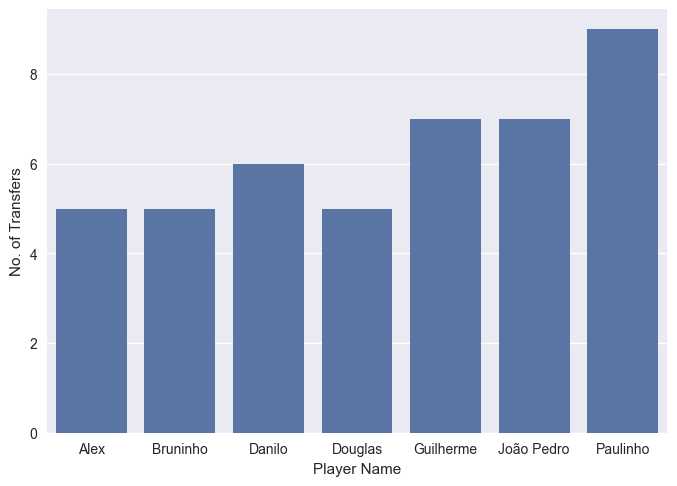

In [43]:
data = pd.DataFrame(club_t.items(),columns=['Player Name',"No. of Transfers"])
plt.style.use("seaborn-v0_8")
sns.barplot(data=data[data['No. of Transfers']>4],x='Player Name',y='No. of Transfers')
plt.savefig("Tranfers")

In [44]:
play_grp=player_data.groupby('player_name')['player_id'].nunique().reset_index()
pd.crosstab(index=play_grp['player_id'],columns="Percentage of players",normalize=True,colnames=['No. of Transfers'])*100

No. of Transfers,Percentage of players
player_id,
1,98.682590
2,1.076421
3,0.166015
4,0.037487
5,0.016066
6,0.005355
7,0.010711
9,0.005355


The contingency table abover shows that majority of players (98.68%) have experienced only one transfer , indicating limited movement in their careers.
A small proportion of players (less than 2%) have undergone multiple transfers, suggesting higher mobility or volatility in their professional carrers
This findings sheds light on the mobility and market dynamics within the football industry, providing valuable insights into the transfer activity of players.

##  Player Market Value Trends Over Time

The objective of this analysis is to examine the historical market valuation trends of football players over time. By merging player data with valuation records, we aim to gain insights into the fluctuations in market value across different seasons.The main analysis involves visualizing market valuations using `Plotly Dash`, allowing users to select specific players and observe their valuation trends over the years. Insights derived from the analysis include identifying trends in player valuation changes and exploring correlations between player performance metrics and market valuation. 

In [45]:
# Merging player and player valuation data for combined player data.
player_data = pd.merge(players, player_valuations[['player_id','datetime','date','dateweek','market_value_in_eur']], on = "player_id")
player_data.drop('market_value_in_eur_x', axis = 1, inplace = True)
player_data.rename(columns = {'market_value_in_eur_y': 'market_value_in_eur'},inplace=True)
player_data['date'] = pd.to_datetime(player_data['date'])
player_data['year'] = player_data['dateweek'].str.split('-').str[0]
player_data.drop(['datetime','image_url','url','agent_name'], axis = 1, inplace = True)
player_data.rename(columns= {'current_club_name':'club_name','current_club_domestic_competition_id':'competition_id'},inplace = True)
display(player_data)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,height_in_cm,highest_market_value_in_eur,contract_expiration_date,competition_id,club_name,height_bin,date,dateweek,market_value_in_eur,year
0,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,NaN,19000000.0,NaN,RU1,Krylya Sovetov Samara,NaN,2004-10-04,2004-10-04,7500000,2004
1,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,NaN,19000000.0,NaN,RU1,Krylya Sovetov Samara,NaN,2005-10-17,2005-10-17,10750000,2005
2,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,NaN,19000000.0,NaN,RU1,Krylya Sovetov Samara,NaN,2006-06-14,2006-06-12,11250000,2006
3,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,NaN,19000000.0,NaN,RU1,Krylya Sovetov Samara,NaN,2007-04-24,2007-04-23,11700000,2007
4,597,Aleksandr,Hleb,Aleksandr Hleb,2016,2696,aleksandr-hleb,UdSSR,Minsk,Belarus,...,NaN,19000000.0,NaN,RU1,Krylya Sovetov Samara,NaN,2007-09-01,2007-08-27,11500000,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424318,621911,Ekrem,Kayilibal,Ekrem Kayilibal,2021,2293,ekrem-kayilibal,Turkey,Konya,Turkey,...,176.0,100000.0,2024-06-30 00:00:00,TR1,Konyaspor,NaN,2021-10-12,2021-10-11,100000,2021
424319,621911,Ekrem,Kayilibal,Ekrem Kayilibal,2021,2293,ekrem-kayilibal,Turkey,Konya,Turkey,...,176.0,100000.0,2024-06-30 00:00:00,TR1,Konyaspor,NaN,2022-01-04,2022-01-03,75000,2022
424320,621911,Ekrem,Kayilibal,Ekrem Kayilibal,2021,2293,ekrem-kayilibal,Turkey,Konya,Turkey,...,176.0,100000.0,2024-06-30 00:00:00,TR1,Konyaspor,NaN,2022-03-31,2022-03-28,75000,2022
424321,621911,Ekrem,Kayilibal,Ekrem Kayilibal,2021,2293,ekrem-kayilibal,Turkey,Konya,Turkey,...,176.0,100000.0,2024-06-30 00:00:00,TR1,Konyaspor,NaN,2022-06-01,2022-05-30,75000,2022


In [46]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Player Valuation Over Years"),
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': player, 'value': player} for player in player_data['name'].unique()],
        placeholder="Select a player",  
        multi=False
    ),
    dcc.Graph(id='valuation-plot')
])

@app.callback(
    Output('valuation-plot', 'figure'),
    [Input('player-dropdown', 'value')]
)
def update_plot(selected_player):
    if selected_player is None:
        return px.line(title="Select a player to view their valuation over years")
    filtered_data = player_data[player_data['name'] == selected_player]
    
    fig = px.line(filtered_data, x=filtered_data['year'], y='market_value_in_eur', 
                  title=f"{selected_player}'s Valuation Over Years")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

##  Club Yellow and Red Card Analysis

This part looks at how football clubs deal with player discipline, focusing on yellow and red cards. By combining club game data with player event details, it aims to provide insights into club-level disciplinary trends.
* The dataset is pivoted to aggregate the total number of yellow and red cards per club, offering a comprehensive view of disciplinary actions.
* We also consider the total number of matches played by each club to put the disciplinary data into context.
* An interactive bubble chart, generated using the Plotly to visualizes the distribution of yellow and red cards across clubs.
* Bubble size in the chart represents the frequency of matches played by each club, while color distinguishes between different clubs

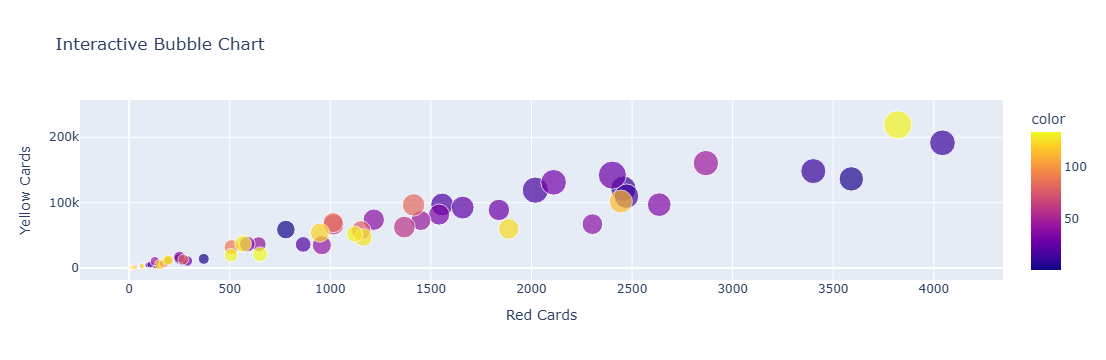

In [47]:
club_m=pd.merge(club_games,game_events[['game_id','player_id']],on='game_id',how='inner')
club_ap_m=pd.merge(club_m[["player_id",'club_id']],appearances[["player_id","yellow_cards","red_cards"]],on="player_id")
m=pd.pivot_table(club_ap_m,index='club_id',values=["yellow_cards","red_cards"],aggfunc='sum')
m['total_match']=pd.pivot_table(game_events,index="club_id",values="game_id",aggfunc="count")
m['total_match'] = m['total_match'].fillna(0)
fig = px.scatter(m.head(100),x='red_cards', y='yellow_cards', size='total_match', color=m.head(100).index,
                 hover_name=m.head(100).index, title='Interactive Bubble Chart',
                 labels={'red_cards': 'Red Cards', 'yellow_cards': 'Yellow Cards'})
fig.update_layout(xaxis_title='Red Cards', yaxis_title='Yellow Cards', showlegend=False)
fig.show()

## Player Nationality Analysis

This A/B testing investigates whether the number of foreign players, and the number of national team players have an impact on the number of wins achieved by clubs. A hypothesis test is conducted to determine if there is a significant difference in the number of wins between clubs with a high percentage of foreign players and those with a lower percentage.

* **Null Hypothesis (H0):** There is no significant difference in the number of wins between clubs with a high percentage of foreign players and those with a lower percentage.
* **Alternate Hypothesis (H1)**: Clubs with a high percentage of foreign players have significantly more wins compared to clubs with a lower percentage.

In [48]:
df=pd.merge(clubs[["club_id",'foreigners_number',"national_team_players"]],club_games[['club_id',"is_win"]],on="club_id")
df=pd.pivot_table(df,index='club_id',values=['foreigners_number',"national_team_players","is_win"],
               aggfunc={"foreigners_number":"mean","national_team_players":"mean","is_win":"sum"})

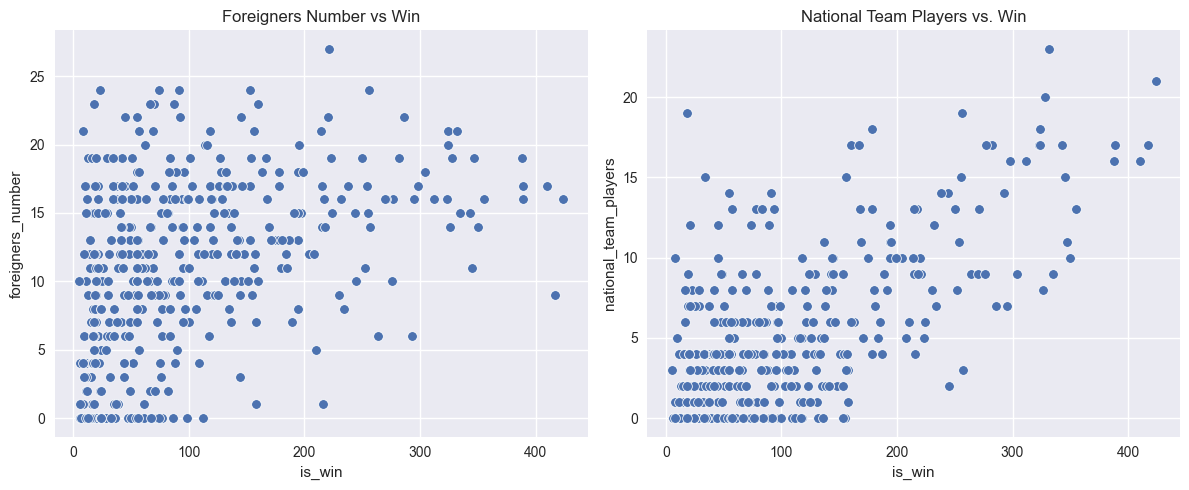

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=df, x="is_win", y="foreigners_number", ax=axes[0])
axes[0].set_title('Foreigners Number vs Win')

sns.scatterplot(data=df, x="is_win", y="national_team_players", ax=axes[1])
axes[1].set_title('National Team Players vs. Win')

plt.tight_layout()
plt.show()

In [50]:
print(np.corrcoef(df['foreigners_number'],df['is_win']))
print(np.corrcoef(df['national_team_players'],df['is_win']))

np.random.seed(1)
g1=df[df['foreigners_number']>df['foreigners_number'].mean()].sample(30)
g2=df[df['foreigners_number']<df['foreigners_number'].mean()].sample(30)

statistic,pvalue=ss.ttest_ind(g1['is_win'],g2['is_win'])
if pvalue<0.05:
    print("There is no significant difference in the number of wins between clubs with a high percentage of foreign players and those with a lower percentage")
else:
    print("We fail to reject the null hypothesis")

[[1.         0.40417937]
 [0.40417937 1.        ]]
[[1.         0.69411684]
 [0.69411684 1.        ]]
There is no significant difference in the number of wins between clubs with a high percentage of foreign players and those with a lower percentage


The t-test did not find a statistically significant positive association between the presence of foreign players and improved club performance at a 5% significance level .These findings can help clubs optimize their team composition to improve performance and achieve better results in competitions.

## Home vs Away Performance Analysis

This analysis focuses on the performance of football clubs in home and away matches across various competitions. The aim is to understand the distribution of wins when clubs play at home versus away and identify if there is a significant difference in performance based on the location of the match.


Firstly, the dataset merges club games and general games data, focusing on essential attributes like club IDs, home and away goals, and competition IDs. Matches are then classified as "Home" or "Away" based on the higher goal-scoring club. A cross-tabulation is conducted to quantify the number of home and away wins per competition. Competitions are filtered based on the average number of matches, ensuring a focus on significant data subsets. Finally, a stacked bar chart visually represents the distribution of home and away wins, providing insights into performance trends across different leagues.

In [51]:
home_away=pd.merge(club_games[['game_id','club_id']],games[['game_id','home_club_goals','away_club_goals','competition_id']],on='game_id',how='left')
home_away=home_away.drop(columns="game_id")
home_away["Home/Away"]=np.where(home_away['home_club_goals']>home_away['away_club_goals'],"Home","Away")
home_away_c=pd.crosstab(index=home_away['competition_id'],columns=home_away['Home/Away'],values=home_away['Home/Away'],aggfunc="count",margins=True)
home_away_c.dropna(inplace=True)
tyr=pd.crosstab(index=home_away['competition_id'],columns=home_away['Home/Away'],values=home_away['Home/Away'],aggfunc="count",margins=True)
tyr.iloc[:-1,2:].mean()
home_away_c=tyr[tyr['All']>2862.232558]
home_away_c

Home/Away,Away,Home,All
competition_id,,,
BE1,3110.0,2528.0,5638
DK1,2196.0,1634.0,3830
EL,2444.0,2136.0,4580
ELQ,2434.0,2160.0,4594
ES1,4358.0,3722.0,8080
FAC,1728.0,1508.0,3236
FR1,4476.0,3540.0,8016
GB1,4540.0,3672.0,8212
GR1,2642.0,2436.0,5078


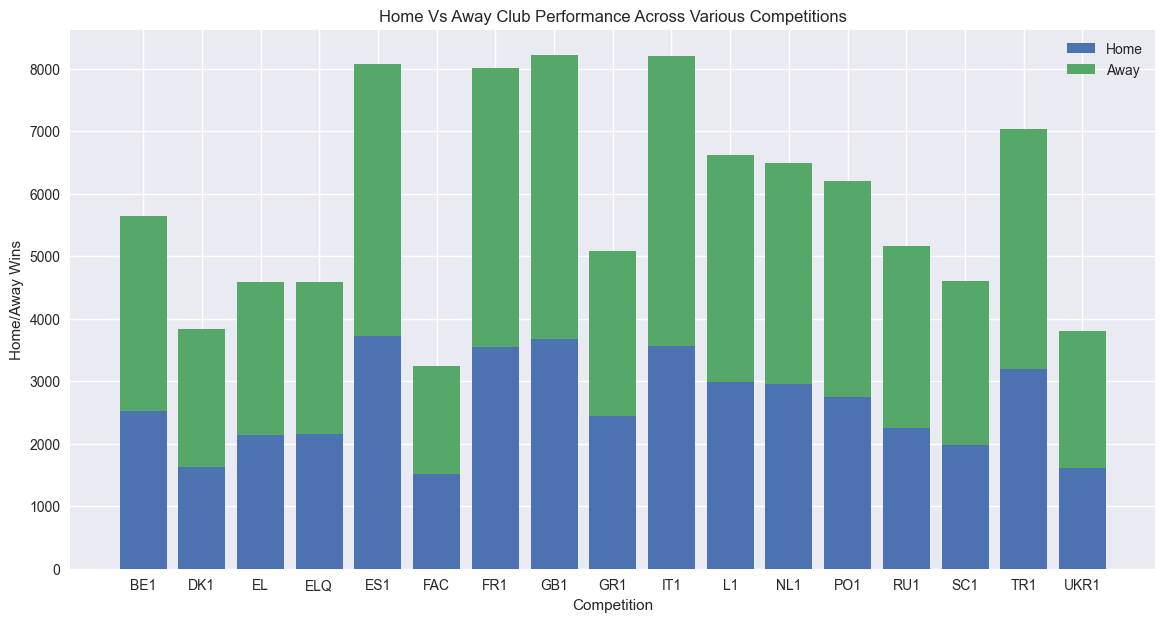

In [52]:
plt.figure(figsize=(14,7))
plt.bar(home_away_c.iloc[:-1].index,home_away_c['All'].iloc[:-1], label = 'Home')
plt.bar(home_away_c.iloc[:-1].index,home_away_c['Away'].iloc[:-1],bottom=home_away_c['Home'].iloc[:-1],label = 'Away')
plt.ylabel("Home/Away Wins")
plt.xlabel("Competition")
plt.title("Home Vs Away Club Performance Across Various Competitions")
plt.legend()

This analysis highlights the significance of match location in football performance, with clubs generally performing better in away games. Understanding this trend can help clubs strategize better for away matches and leverage their home advantage effectively. 

## Club Performace Report

This section focuses on evaluating the performance of football clubs based on various metrics derived from match data. The process begins with merging club game records and game event data to gather comprehensive information. Subsequently, player-level data, including yellow cards and red cards, is aggregated at the club level using pivot tables. Additionally, match-related metrics like opponent goals, opponent position, and match outcomes are consolidated for each club. Using a scoring mechanism considering goals, match outcomes, and disciplinary actions, clubs are ranked to provide a comparative assessment of their standing.

**Weight Assignment Rationale :** 

* Home Club Goals (0.2): Given moderate importance as goals scored at home reflect a team's ability to capitalize on home advantage.

* Away Club Goals (0.2): Similar weight as home goals, emphasizing the significance of defensive stability in away matches.

* Red Cards (-0.1): Negative weight assigned due to the detrimental impact of player dismissals on team performance and prospects of winning.

* Yellow Cards (-0.1): Negative weight attributed to the potential consequences of accumulated bookings, such as player suspensions and team disadvantage.

* Match Wins (0.3): Given the highest weight to prioritize the ultimate objective of football – winning matches and securing points.

* Opponent Goals (-0.2): Negative weight assigned to emphasize the importance of defensive solidity and minimizing goals conceded.

* Opponent Position (0.1): Positive weight to acknowledge the varying levels of difficulty posed by opponents based on their league standings, influencing the significance of match outcomes

In [53]:
club_m=pd.merge(club_games,game_events[['game_id','player_id']],on='game_id',how='inner')
club_ap_m=pd.merge(club_m[["player_id",'club_id']],appearances[["player_id","yellow_cards","red_cards"]],on="player_id")
m=pd.pivot_table(club_ap_m,index='club_id',values=["yellow_cards","red_cards"],aggfunc='sum')
l=pd.pivot_table(club_games,index='club_id',values=["opponent_goals","opponent_position","is_win"],aggfunc="sum")
p=pd.merge(m,l,on="club_id",how="inner")
report=pd.merge(home_away[['club_id','home_club_goals','away_club_goals']],p,on="club_id").set_index("club_id")
display(report)

,home_club_goals,away_club_goals,red_cards,yellow_cards,is_win,opponent_goals,opponent_position
club_id,,,,,,,
440,0,1,5,360,1,14,-5
113,0,4,14,1196,1,26,-9
60,1,1,1016,66455,145,577,3148
41,0,1,644,36443,76,401,1786
24,2,1,1658,92456,194,685,3417
...,...,...,...,...,...,...,...
12,0,0,3401,148275,282,610,4432
11127,1,1,832,46555,108,481,2367
338,0,2,2374,91369,264,410,2027


In [54]:
cl_report=pd.merge(report,clubs[['club_id','name']],on='club_id').drop_duplicates()
m=list(cl_report[cl_report['name'].isna()]['club_id'])
df=cl_report[~cl_report['club_id'].isin(m)]

df=df.reset_index()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['index', 'club_id'])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
N_df = pd.DataFrame(scaled_data, columns=numeric_columns)
N_df[['index', 'club_id', 'name']] = df[['index', 'club_id', 'name']]



weights = {
    'home_club_goals': 0.2,
    'away_club_goals': 0.2,
    'red_cards': -0.1,
    'yellow_cards': -0.1,
    'is_win': 0.3,
    'opponent_goals': -0.2,
    'opponent_position': 0.1
}

N_df['score'] = (
    N_df['home_club_goals'] * weights['home_club_goals'] +
    N_df['away_club_goals'] * weights['away_club_goals'] +
    N_df['red_cards'] * weights['red_cards'] +
    N_df['yellow_cards'] * weights['yellow_cards'] +
    N_df['is_win'] * weights['is_win'] +
    N_df['opponent_goals'] * weights['opponent_goals'] +
    N_df['opponent_position'] * weights['opponent_position']
)

M_r  = N_df.groupby(['club_id','name'])['score'].mean().reset_index()
M_r['rank'] = M_r['score'].rank(ascending=False)
display(M_r[["name","score","rank"]].sort_values(by="rank"))

,name,score,rank
9,Bayern Munich,0.216166,1.0
64,Celtic FC,0.191035,2.0
101,Olympiacos Piraeus,0.187729,3.0
93,Ajax Amsterdam,0.175238,4.0
50,Manchester City,0.168389,5.0
...,...,...,...
118,Celta de Vigo,-0.021305,232.0
72,Udinese Calcio,-0.022362,233.0
129,UC Sampdoria,-0.022968,234.0
128,Bologna FC 1909,-0.026504,235.0


The performance Report  provides valuable insights into the strengths and weaknesses of football clubs, enabling stakeholders to make informed decisions regarding team management, player recruitment, and strategic planning. By considering multiple performance indicators, this analysis provides a holistic view of club performance, facilitating data-driven strategies for improvement and success in competitive football environments.

## Age Group Dynamics and Performance in Football Clubs

Here we examine the relationship between the age of players and the success of football clubs.Player ages are categorized into three distinct bins: (22-24], (24-26], and (26-28] and aggregated based on no. of wins. This categorization allows for a more focused examination of player age groups and their corresponding performance outcomes.

(array([  4.,   2.,  16.,  52.,  56., 103.,  63.,  43.,  26.,   8.]),
 array([20.9 , 21.76, 22.62, 23.48, 24.34, 25.2 , 26.06, 26.92, 27.78,
        28.64, 29.5 ]),
 <BarContainer object of 10 artists>)

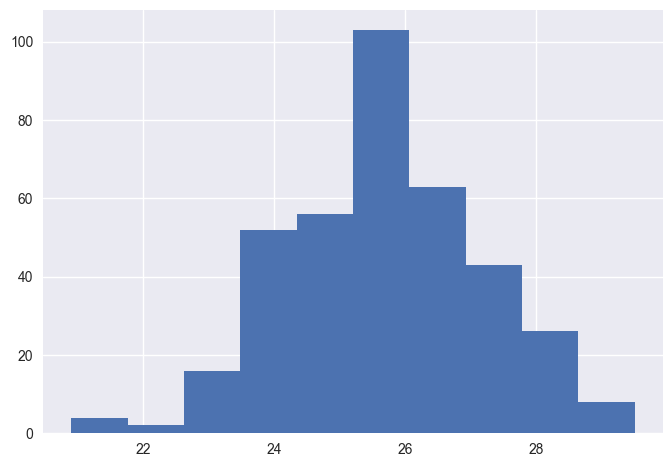

In [55]:
plt.hist(clubs['average_age'])

In [56]:
clubs['age_bin']=pd.cut(clubs['average_age'],bins=[22,24,26,28])
clu_age=pd.merge(clubs,club_games[['club_id','is_win']],on="club_id")
pd.pivot_table(clu_age,index="age_bin",values="is_win",aggfunc="sum",observed=False)

,is_win
age_bin,
"(22, 24]",3720
"(24, 26]",18919
"(26, 28]",14252


Clubs with players aged between 24 and 26 years exhibit the highest number of wins, totaling an impressive 18,919 victories. Meanwhile clubs with players aged 22 to 24 years achieved a total of 3,720 wins, indicating a comparatively lower success rate.This helps us to understand the significance of player age in determining club success. 

##  Exploring the Relationship Between Squad Size and Win Rates

In the realm of football, the dynamics of squad composition often spark discussions about their impact on team performance. Among the various factors considered, squad size stands out as a pivotal element that may influence a club's success on the field. This analysis delves into the intriguing question: does squad size affect with win rates of football clubs?

To address this question,we construct a pivot table to aggregate win counts based on squad size. This initial step allows us to examine potential trends and patterns in the data.

Corelation between 0.39450477400286577


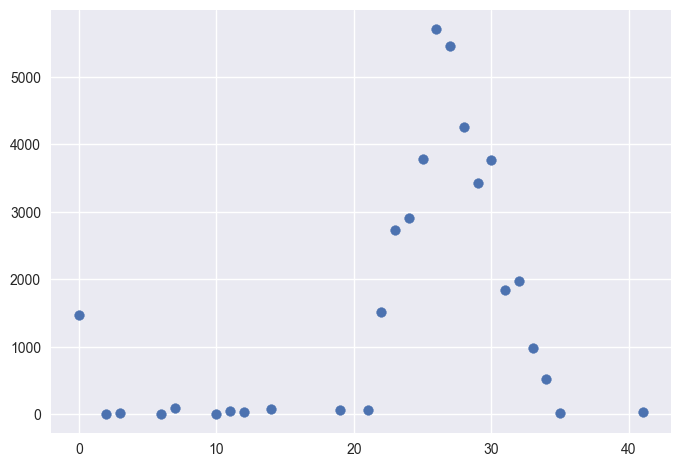

In [57]:
t=pd.pivot_table(clu_age,index="squad_size",values="is_win",aggfunc="sum",observed=False)
print("Corelation between",np.corrcoef(t.index,t['is_win'])[0][1])
plt.scatter(t.index,t['is_win'])

There is moderate postive corelation of 0.39 between squad size and win rates.

We perform a t-test, we assess whether there exists a significant association between squad size and win rates. This hypothesis testing allows us to draw conclusions about the relationship between these variables.

**Null Hypothesis (H0)**: There is no significant association between squad size and win rates.

**Alternate Hypothesis(H1)**: There is a significant association between squad size and win rates.

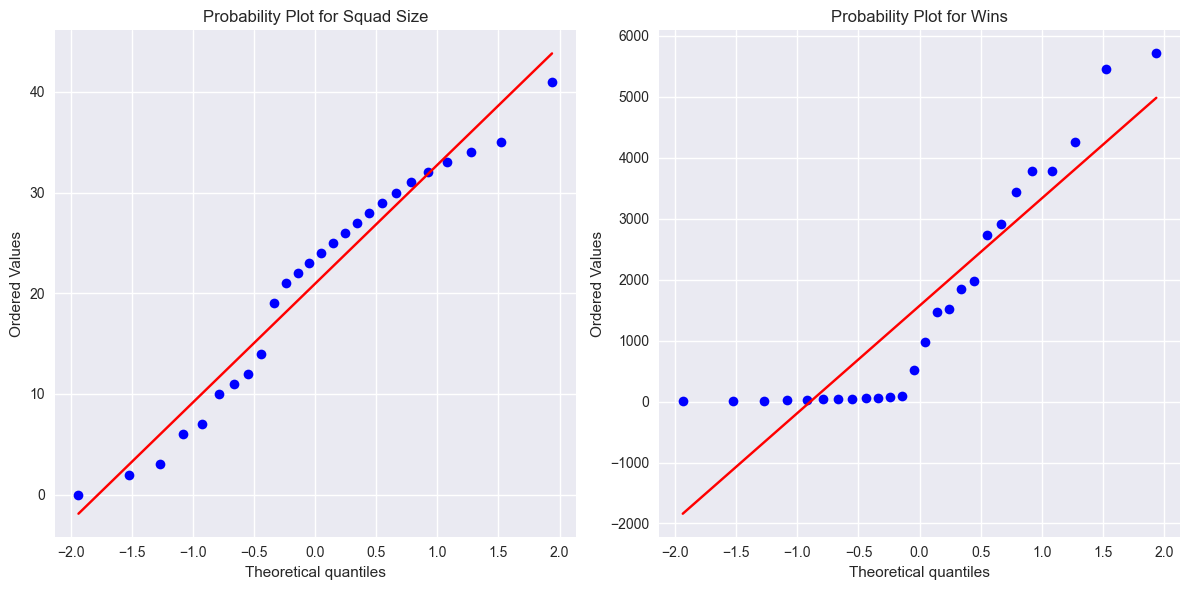

In [58]:
# Before performing t-test , we check the assumptions of t test whether the data follows a normal distriution or not using qq-plot.
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ss.probplot(t.index, plot=axs[0])
axs[0].set_title('Probability Plot for Squad Size')

ss.probplot(t['is_win'], plot=axs[1])
axs[1].set_title('Probability Plot for Wins')

plt.tight_layout()
plt.show()

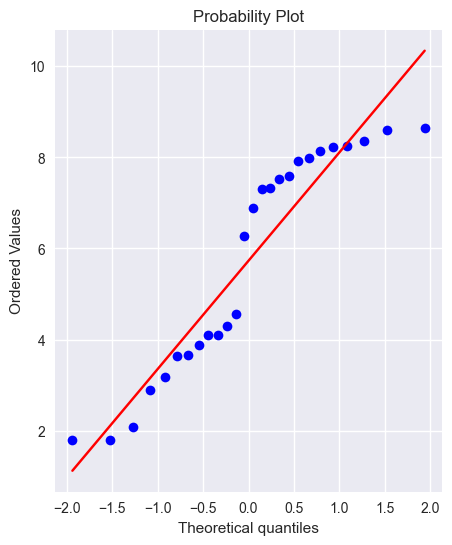

In [59]:
# As win rates do not follow normal distribution , we perform log transformation.
data_transform = np.log(t['is_win'])
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111) 
ss.probplot(data_transform, plot=ax)
plt.show()

In [60]:
test_statistics,pvalue=ss.ttest_ind(t.index,data_transform)
if pvalue < 0.05:
    print("There is a significant association between squad size and win rates.")
else:
    print("There is no significant association between squad size and win rates.")

There is a significant association between squad size and win rates.


The results of the t-test indicate a significant association between squad size and win rates, suggesting that squad size may indeed influence a football club's performance on the field. so yes , squad size does affect with win rates of football clubs.

## Top 5 players of individual club

The below show are Top 5 players of individual clubs based on goals.It focuses on aggregating player goal statistics across different football clubs to gain insights into their goal-scoring prowess. Initially, a pivot table is constructed to calculate the total goals scored by each player based on their unique player IDs the data is then merged with information about player current club IDs and names to contextualize goal contributions within specific clubs.Finally, a dictionary is created to map each club ID to a list of player names, offering a concise representation of the top goal scorers associated with each club.

In [61]:
goal_sum=pd.pivot_table(appearances,index="player_id",values="goals",aggfunc="sum")

goals_sum_club=pd.merge(goal_sum,appearances[["player_id","player_current_club_id","player_name"]],on="player_id",how="inner")

goals_sum_club=pd.merge(goals_sum_club,clubs[['club_id','name']],left_on="player_current_club_id",right_on="club_id",how="left").drop_duplicates()
goals_sum_club.sort_values(by="goals",ascending=False,inplace=True)

q={}
for i in goals_sum_club['name'].unique():
    l=goals_sum_club[goals_sum_club['name']==i]['player_name'].unique()
    q[i]=l
    
goals_sum_club=pd.DataFrame(q.items())
goals_sum_club.columns=["Club name","Top players"]
goals_sum_club

,Club name,Top players
0,FC Barcelona,"[Robert Lewandowski, Sergio Agüero, Raphinha, ..."
1,Paris Saint-Germain,"[Lionel Messi, Neymar, Kylian Mbappé, Sergio R..."
2,Manchester United,"[Cristiano Ronaldo, Wout Weghorst, Bruno Ferna..."
3,Tottenham Hotspur,"[Harry Kane, Heung-min Son, Ivan Perisic, Luca..."
4,Real Madrid,"[Karim Benzema, Gareth Bale, Eden Hazard, Marc..."
...,...,...
232,Torpedo Moscow,"[Igor Lebedenko, Ilya Kukharchuk, Aleksandr Ry..."
233,Gaziantep FK,"[Torgeir Börven, Marko Jevtovic, André Sousa, ..."
234,Metalist Kharkiv,"[Dmytro Korkishko, Maksym Pryadun, Yegor Kartu..."
235,Istanbulspor,"[Valon Ethemi, Ertugrul Ersoy, Sidrit Guri, Ja..."


## Top performing clubs of each competitions

This identifies the top three football clubs in various domestic competitions based on their total wins. First, the total wins for each club are aggregated and merged with club and competition information to provide a comprehensive dataset. This dataset includes club IDs, club names, competition IDs, and total win. A pivot table is then used to rank the clubs within their competitions, highlighting the top three clubs with the most wins.  Additionally, an interactive bar chart is generated, allowing users to select a specific competition and view the top three performing clubs dynamically.

In [62]:
club_o=pd.pivot_table(club_games,index="club_id",values="is_win",aggfunc='sum')
club_win=pd.merge(clubs,club_o,on="club_id",how="left")
club_win_d=club_win[["domestic_competition_id","club_id","name","is_win"]].rename(columns={"domestic_competition_id":"competition_id","name":"club_name"})
club_win_d=pd.merge(club_win_d,competitions[['competition_id','name']],on="competition_id",how="left")
club_win_d_p=pd.pivot_table(club_win_d,index=["name","club_name"],values="is_win",aggfunc="sum")
teams_df=pd.DataFrame(club_win_d_p.groupby(level='name')['is_win'].nlargest(3).reset_index(level=club_win_d_p.index.names.index('name')))
teams_df.drop(columns="name",inplace=True)
teams_df.reset_index(inplace=True)

In [63]:
def update_teams_plot(selected_competition):
    plt.figure(figsize=(8, 6))
    
    sns.barplot(x='club_name', y='is_win', data=teams_df[teams_df['name'] == selected_competition], palette='pastel')
    plt.title(f'Wins by Team in {selected_competition}')
    plt.xlabel('Team')
    plt.ylabel('Wins')
    
    plt.tight_layout()
    plt.show()

competition_dropdown = widgets.Dropdown(
    options=teams_df['name'].unique(),
    value=teams_df['name'].iloc[0],
    description='Select Competition:',
    style={'description_width': 'initial'}
)

teams_output = widgets.interactive_output(update_teams_plot, {'selected_competition': competition_dropdown})

display(competition_dropdown, teams_output)

Dropdown(description='Select Competition:', options=('bundesliga', 'eredivisie', 'jupiler-pro-league', 'laliga…

Output()

## Top Scorer Analysis

This analysis highlights the top performers in terms of goal-scoring within each league, providing a clear overview of the leading players across various competitions.Additionally, an interactive bar chart is generated, allowing users to select a specific competition and view the top three performing players dynamically.

In [64]:
play = pd.merge(players, player_valuations[['player_id','datetime','date','dateweek','market_value_in_eur']], on = "player_id")
play.rename(columns= {'current_club_name':'club_name','current_club_domestic_competition_id':'competition_id'},inplace = True)
top_l = pd.merge(appearances, play[['player_id','club_name']], on = 'player_id', how ='left')
top_l.drop_duplicates(inplace=True)
top_l = pd.merge(top_l, competitions[['competition_id', 'name']], on = 'competition_id', how = 'left')
l=pd.pivot_table(top_l,index=["name","player_name"],values=["goals"],aggfunc="sum",dropna=True)
df=pd.DataFrame(l.groupby(level='name')['goals'].nlargest(3))
df=pd.DataFrame(l.groupby(level='name')['goals'].nlargest(3)).reset_index(level=df.index.names.index('name'))
df.drop(columns="name",inplace=True)
df.reset_index(inplace=True)
display(df)

,name,player_name,goals
0,allianz-cup,Paulinho,20
1,allianz-cup,Jonas,10
2,allianz-cup,Dyego Sousa,8
3,belgian-supercup,Sébastien Dewaest,2
4,belgian-supercup,Adrien Trébel,1
...,...,...,...
121,ukrainian-cup,Bernard,6
122,ukrainian-cup,Bogdan Lednev,6
123,ukrainian-super-cup,Facundo Ferreyra,2
124,ukrainian-super-cup,Lassina Traoré,2


In [65]:
def update_plot(selected_league):
    plt.figure(figsize=(8, 6))
    
    sns.barplot(x='player_name', y='goals', data=df[df['name'] == selected_league], palette='plasma')
    plt.title(f'Goals by Player in {selected_league}')
    plt.xlabel('Player')
    plt.ylabel('Goals')
    
    plt.tight_layout()
    plt.show()

league_dropdown = widgets.Dropdown(
    options=df['name'].unique(),
    value=df['name'].iloc[0],
    description='Select League:',
    style={'description_width': 'initial'}
)

output = widgets.interactive_output(update_plot, {'selected_league': league_dropdown})

display(league_dropdown, output)

Dropdown(description='Select League:', options=('allianz-cup', 'belgian-supercup', 'bundesliga', 'community-sh…

Output()

# Conclusion


Our data-driven exploration through the intricate realm of football has been a revelatory journey, illuminating the transformative power of data in unraveling the sport's multifaceted dynamics. Spanning a diverse array of datasets, we navigated through complex merges and statistical analyses, armed with tools like Pandas, NumPy, Matplotlib, and Scikit-learn, to extract invaluable insights.

The challenges encountered in merging data from eight distinct datasets underscored the complexity inherent in football data analysis. Yet, our unwavering determination was rewarded with a profound understanding of player performance, club strategies, and match dynamics – insights that transcend mere statistics and unveil the deeper narratives woven into the fabric of the game.

Our analytical arsenal encompassed a range of statistical techniques, including pivot tables, correlation analysis, and hypothesis testing, each offering unique perspectives on football's multifaceted landscape. These methodologies not only shed light on current trends but also paved the way for future explorations and innovations.

As we look towards the futualyis (EDA) lays the groundwork for further advancements in the field. As football data continues to evolve, opportunities abound for deeper analysis, trend forecasting, and actionable insights that can benefit teams, analysts, and fans alike. Imagine a world where data-driven decision-making becomes the norm, where clubs leverage advanced analytics to optimize player acquisitions, tactical strategies, and youth development programs – a world where the beautiful game is elevated to new heights through the power nnovation.